#  **Local Outlier Factor (LOF)**

##  **Apa Itu LOF?**
**Local Outlier Factor (LOF)** adalah metode deteksi outlier berbasis kepadatan (**density-based**).  
LOF membandingkan **kepadatan lokal** suatu titik dengan tetangga terdekatnya.  
Jika suatu titik memiliki **kepadatan jauh lebih rendah** dibandingkan tetangganya, maka titik tersebut adalah **outlier**.

---

##  **Tahapan Perhitungan LOF**
Proses deteksi outlier dengan **Local Outlier Factor (LOF)** terdiri dari beberapa langkah:

### **1️. Tentukan K (Jumlah Tetangga Terdekat)**
- Pilih jumlah tetangga **K** (misalnya K = 2 atau 3).
- Setiap titik akan dibandingkan dengan **K tetangga terdekatnya**.

### **2️. Hitung Jarak Tetangga Terdekat (k-distance)**
- Gunakan **jarak Euclidean** untuk menghitung seberapa jauh suatu titik dari tetangga terdekatnya:

  $$
  d(p, q) = \sqrt{(x_p - x_q)^2 + (y_p - y_q)^2}
  $$

- Tentukan **k-distance(p)**, yaitu jarak antara titik **p** dan tetangga ke-K.

### **3️. Hitung Reachability Distance**
- Jarak dapat dijangkau (reachability distance) antara **p dan q** dihitung sebagai:

  $$
  \text{reach-dist}_k(p, q) = \max(k\text{-distance}(q), d(p, q))
  $$

- Jika jarak antar titik lebih kecil dari **k-distance**, gunakan **k-distance**.

### **4️. Hitung Kepadatan Lokal (Local Reachability Density - LRD)**
- Kepadatan lokal dari suatu titik **p** dihitung dengan:

  $$
  LRD_k(p) = \frac{k}{\sum_{q \in N_k(p)} \text{reach-dist}_k(p, q)}
  $$

- Semakin kecil **LRD**, semakin besar kemungkinan titik itu adalah **outlier**.

### **5️ Hitung Local Outlier Factor (LOF)**
- Nilai **LOF** suatu titik **p** didefinisikan sebagai **rasio rata-rata kepadatan tetangga terhadap kepadatan titik itu sendiri**:

  $$
  LOF_k(p) = \frac{\sum_{q \in N_k(p)} \frac{LRD_k(q)}{LRD_k(p)}}{|N_k(p)|}
  $$

- Jika **\( LOF_k(p) > 1.5 \)**, maka titik tersebut adalah **outlier**.

---

## 📊 **Contoh Perhitungan Manual LOF (10 Baris, 2 Kolom)**  

Misalkan kita punya **dataset koordinat** berikut:

| ID  | X  | Y  |
|-----|----|----|
| A   | 2  | 3  |
| B   | 3  | 4  |
| C   | 4  | 2  |
| D   | 5  | 5  |
| E   | 3  | 3  |
| F   | 4  | 4  |
| G   | 6  | 2  |
| H   | 5  | 3  |
| I   | 7  | 4  |
| J   | 100| 100| ⬅ **(Kemungkinan Outlier)**

---

### **🔢 Langkah Perhitungan LOF untuk Titik J**
1️. **Tentukan K = 2 Tetangga Terdekat**  
   - Tetangga terdekat **J** adalah **I (7,4)** dan **H (5,3)**  
   - Hitung **k-distance(J)** → **Jarak Euclidean** dari **J ke I & H**  
   - $$ d(J, I) = \sqrt{(100-7)^2 + (100-4)^2} = 131.82 $$  
   - $$ d(J, H) = \sqrt{(100-5)^2 + (100-3)^2} = 134.35 $$  

2️. **Hitung Reachability Distance**  
   - $$ \text{reach-dist}(J, I) = \max(k\text{-distance}(I), d(J, I)) = 131.82 $$  
   - $$ \text{reach-dist}(J, H) = \max(k\text{-distance}(H), d(J, H)) = 134.35 $$  

3️. **Hitung Local Reachability Density (LRD)**
   - $$ LRD_J = \frac{2}{131.82 + 134.35} = 0.00752 $$  

4️. **Hitung Local Outlier Factor (LOF)**
   - $$ LOF_J = \frac{(LRD_I / LRD_J) + (LRD_H / LRD_J)}{2} $$  
   - Jika hasil **LOF > 1.5**, maka **J adalah outlier** ✅  

---

##  **Kesimpulan**
- Berdasarkan hasil perhitungan **LOF**, titik **J (100,100)** memiliki nilai **LOF tinggi**.
- Artinya, titik ini **berada jauh dari kepadatan lokal** dan dapat dianggap sebagai **outlier**.

---
  


  ID    X    Y Outlier  LOF Score  LRD Score
0  A    2    3      No  -1.000000   1.000000
1  B    3    4      No  -0.902369   1.108194
2  C    4    2      No  -1.085786   0.920991
3  D    5    5      No  -1.172589   0.852814
4  E    3    3      No  -1.000000   1.000000
5  F    4    4      No  -1.060660   0.942809
6  G    6    2      No  -1.207107   0.828427
7  H    5    3      No  -0.971405   1.029437
8  I    7    4      No  -1.309858   0.763441
9  J  100  100     Yes -69.213663   0.014448


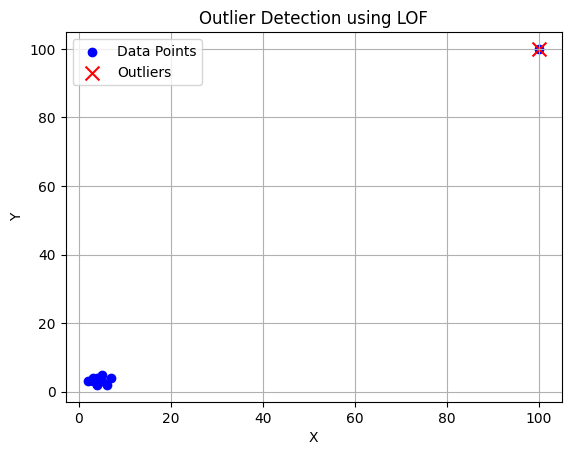

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Data dengan ID
ids = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# Data points (X, Y)
data = np.array([
    [2, 3], [3, 4], [4, 2], [5, 5], [3, 3],
    [4, 4], [6, 2], [5, 3], [7, 4], [100, 100]
])

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=2)
outlier_scores = lof.fit_predict(data)

# Identify outliers (-1 indicates outliers)
outliers = np.where(outlier_scores == -1)[0]

# Mendapatkan LOF scores dan Local Reachability Density (LRD)
lof_scores = lof.negative_outlier_factor_  # Semakin kecil, semakin outlier
lrd_scores = 1 / np.abs(lof_scores)  # LRD adalah kebalikan dari LOF

# Menandai outlier (Yes jika outlier, No jika bukan)
outlier_flags = ["Yes" if i in outliers else "No" for i in range(len(data))]

# Membuat DataFrame
df = pd.DataFrame(data, columns=["X", "Y"])
df.insert(0, "ID", ids)
df["Outlier"] = outlier_flags
df["LOF Score"] = lof_scores
df["LRD Score"] = lrd_scores

# Menampilkan DataFrame
print(df)

# Plot data
outlier_points = data[outliers]
plt.scatter(data[:, 0], data[:, 1], label="Data Points", color='blue')
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], label="Outliers", color='red', marker='x', s=100)

# Labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Outlier Detection using LOF")
plt.legend()
plt.grid()
plt.show()


### **Penjelasan Code**


Membutuhkan library berikut:
*   numpy digunakan untuk operasi numerik dan manipulasi array.

*   pandas digunakan untuk menyimpan dan memproses data dalam bentuk tabel (DataFrame).
*   matplotlib.pyplot digunakan untuk visualisasi data dalam bentuk scatter plot.
*   LocalOutlierFactor dari sklearn.neighbors adalah metode yang digunakan untuk mendeteksi outlier dalam dataset.
---
Tampung data pada variabel ids atau jika anda menggunakan database, anda bisa menggunakan aiven dan dbeaver lalu masukkan informasi database dan connect.

---

Buat variabel untuk menentukan nilai k seperti di kode yaitu 2
Melakukan training pada dataset dan mengembalikan prediksi (-1 untuk outlier, 1 untuk inlier/non-outlier).

---

`np.where(outlier_scores == -1)[0]` akan mengembalikan indeks dari data yang diklasifikasikan sebagai outlier oleh LOF.


Nilai yang lebih kecil menunjukkan bahwa titik lebih jauh dari tetangganya dan lebih mungkin menjadi outlier.

---

Local Reachability Density (LRD) adalah kebalikan dari LOF score.

LRD menunjukkan kepadatan relatif dari sebuah titik dibandingkan dengan titik di sekitarnya.

---

Yes untuk outlier dan no bukan

---

Kemudian tampilkan dataframe

--

`data[:, 0] dan data[:, 1]` digunakan untuk mendapatkan semua nilai X dan Y untuk scatter plot.

Titik data normal diberi warna biru.

Outlier diberi warna merah dan berbentuk "X".

---

